<a href="https://colab.research.google.com/github/Sheila-RV/RojasSheila_SIS420/blob/main/PrimerParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lectura de archivo con pandas
df_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/train.csv')

In [ ]:
df_.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   100000 non-null  object
 1   Occupation             100000 non-null  object
 2   Type_of_Loan           100000 non-null  object
 3   Credit_Mix             100000 non-null  object
 4   Payment_of_Min_Amount  100000 non-null  object
 5   Payment_Behaviour      100000 non-null  object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
#Eliminar columna ID, Costumer_ID, Month, Name, SSN, Occopation, Type_of_Loan, Credit_Mix, Payment_of_Mint_Amount, Payment_Behaviour

In [ ]:
df_ = df_.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], axis=1)

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [ ]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.316340,10.764812,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4197.270835,3186.432497,303.645417,1626.594167,3095.905000,5957.715000,15204.633333
Num_Bank_Accounts,100000.0,5.368820,2.593314,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.533570,2.067098,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.081410,14.804560,0.000000,10.000000,18.000000,28.000000,62.000000
Num_of_Delayed_Payment,100000.0,13.313120,6.237166,0.000000,9.000000,14.000000,18.000000,25.000000
Changed_Credit_Limit,100000.0,10.470323,6.609481,0.500000,5.380000,9.400000,14.850000,29.980000


In [ ]:
df_.shape

(100000, 18)

In [ ]:
#Cambiar el target a valores numéricos 1-Poor 2-Standard 3-Good

In [ ]:
mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}

# Aplicar el mapeo a la columna 'Credit_Score'
Credit_Score = df_.iloc[:, -1]
df_.iloc[:, -1] = np.array([mapping[score] for score in Credit_Score])

In [ ]:
#convertir a numerico la ultima columna
df_.iloc[:, -1] = pd.to_numeric(df_.iloc[:, -1])


In [ ]:
df_['Credit_Score'] = df_['Credit_Score'].astype(int)

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [ ]:
#Convertir a numpy array+
df_array=df_.values

In [ ]:
df_array

array([[2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        2.14653803e+01, 3.12494089e+02, 3.00000000e+00],
       [2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        2.14653803e+01, 2.84629162e+02, 3.00000000e+00],
       [2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        2.14653803e+01, 3.31209863e+02, 3.00000000e+00],
       ...,
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        2.40284774e+01, 5.16809083e+02, 1.00000000e+00],
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        2.40284774e+01, 3.19164979e+02, 2.00000000e+00],
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        2.40284774e+01, 3.93673696e+02, 1.00000000e+00]])

Agregar datos sinteticos
- Se agrega la columna home_ownership_status donde se asigna 1 si la persona vive en una casa de su propiedad o 0 si es alquilada
- Se agrega la columna Dependents, que es el numero de personas que dependen economicamente de la persona donde se asigna un número aleatorio entre 1 y 3 para credit score de 2 o 3 y se asigna un numero aleatorio entre 3 y 8 para credit score de 1

In [ ]:
credit_scores = df_array[:, -1]

# Crear la nueva columna Home_Ownership_Status basada en el Credit_Score
home_ownership_status = np.where(credit_scores != 1, 1, 0)  # Si Credit_Score es Standard o Good (no es 0), se pone 1, de lo contrario 0

# Agregar la columna Home_Ownership_Status al dataset
ds_sintetico= np.hstack((df_array, home_ownership_status.reshape(-1, 1)))

print(ds_sintetico)

[[2.30000000e+01 1.91141200e+04 1.82484333e+03 ... 3.12494089e+02
  3.00000000e+00 1.00000000e+00]
 [2.30000000e+01 1.91141200e+04 1.82484333e+03 ... 2.84629162e+02
  3.00000000e+00 1.00000000e+00]
 [2.30000000e+01 1.91141200e+04 1.82484333e+03 ... 3.31209863e+02
  3.00000000e+00 1.00000000e+00]
 ...
 [2.50000000e+01 3.96289900e+04 3.35941583e+03 ... 5.16809083e+02
  1.00000000e+00 0.00000000e+00]
 [2.50000000e+01 3.96289900e+04 3.35941583e+03 ... 3.19164979e+02
  2.00000000e+00 1.00000000e+00]
 [2.50000000e+01 3.96289900e+04 3.35941583e+03 ... 3.93673696e+02
  1.00000000e+00 0.00000000e+00]]


In [ ]:
# Generar la columna Dependents
def generar_dependents(credit_scores):
    dependents = np.zeros_like(credit_scores, dtype=int)
    for i, score in enumerate(credit_scores):
        if score == 2 or score == 3:
            dependents[i] = np.random.randint(1, 4)  # Números aleatorios entre 1 y 3
        elif score == 1:
            dependents[i] = np.random.randint(3, 9)  # Números aleatorios entre 3 y 8
    return dependents

dependents = generar_dependents(credit_scores)

# Agregar la columna Dependents al dataset
ds_sintetico = np.hstack((ds_sintetico, dependents.reshape(-1, 1)))

In [ ]:
ds_sintetico[110]

array([3.90000000e+01, 8.70154500e+03, 5.19128750e+02, 6.00000000e+00,
       5.00000000e+00, 3.20000000e+01, 7.00000000e+00, 2.10000000e+01,
       9.00000000e+00, 8.86000000e+00, 9.00000000e+00, 2.60269000e+03,
       3.84654154e+01, 1.13000000e+02, 3.65481972e+01, 1.30662099e+01,
       2.64892872e+02, 1.00000000e+00, 0.00000000e+00, 5.00000000e+00])

In [ ]:
ds_sint=ds_sintetico.copy()

2.      Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

3.      Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

In [ ]:
#crear grafica con Age y Credit Scores


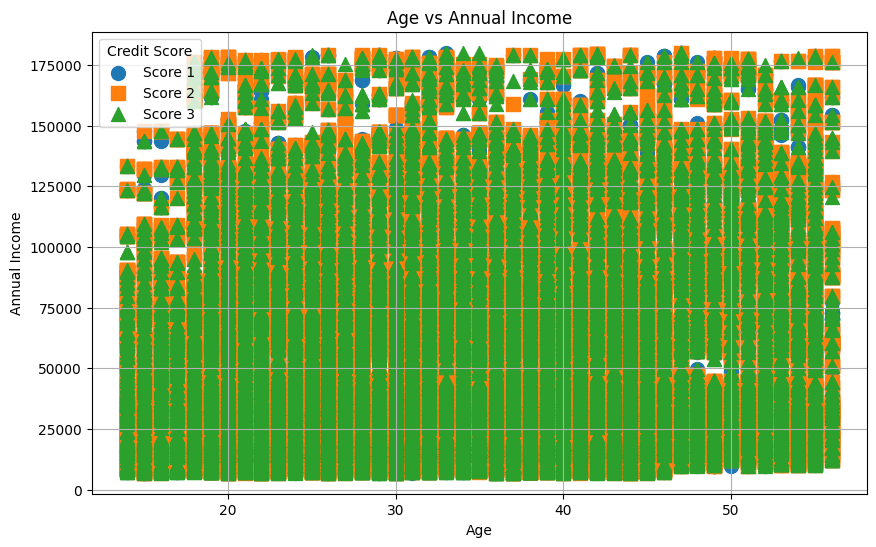

In [ ]:

# Datos
ages = ds_sint[:,0]
annual_income = ds_sint[:,1]
credit_scores = ds_sint[:,-1]

# Mapa de formas para los diferentes valores de Credit_Score
marker_styles = {1: 'o', 2: 's', 3: '^'}

# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Graficar cada grupo con una forma distinta
for score, marker in marker_styles.items():
    # Seleccionar los datos para el score actual
    mask = credit_scores == score
    plt.scatter(ages[mask], annual_income[mask], marker=marker, label=f'Score {score}', s=100)

# Añadir etiquetas y título
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')
plt.legend(title='Credit Score')
plt.grid(True)

# Mostrar la gráfica
plt.show()


4.      Dividir los datos del dataset sintético en datos de entrenamiento y prueba
Se utilizará para el entrenamiento: 80% de los datos y en prueba: 20% de los datos